In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_test, y_test
### only X_train and y_train important

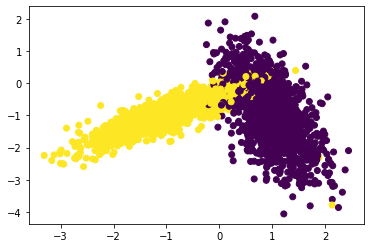

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV 

    
    
    '''
        dry run
        ------train data-----
        count   = 2        1       0
                = g3      g2      g1

        count-1 = 1        0      -1
                = g2      g1      g3
                
    train_x = (g3+g3) (g0+g1) (g1+g3)
        --------test data------
        count-2 = 0       -1      -2
        
    train_x_cv = (g1)    (g3)    (g2)
    '''

In [3]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    ##### STEP-1 ---> Generate 10 unique value randomly in 'param_range' 
    
    param_ls = sorted(random.sample(range(1, param_range), 10))
    param_ls # these are the hypyerparameter K in K-NN
    
    ##### STEP-2 ---> Divide the Training Data in "folds" number of time
    
            ## for x_train
    size_per_fold = x_train.shape[0]//folds
    train_1 = x_train[:size_per_fold]
    train_2 = x_train[size_per_fold:(size_per_fold*2)]
    train_3 = x_train[-size_per_fold:]

    total_x_train = list([train_1, train_2, train_3])
            
            ## for y_train
    test_1 = y_train[:size_per_fold]
    test_2 = y_train[size_per_fold:(size_per_fold*2)]
    test_3 = y_train[-size_per_fold:]
    
    total_y_train = list([test_1, test_2, test_3])
    
    #### SET-3 Do k-fold CV
    train_score = []
    test_score = []
    for nn in tqdm(param_ls):

        # print(nn)

        count = 2
        for k in range(folds):
            train_fold = []
            test_fold = []

            train_x = np.vstack((total_x_train[count], total_x_train[count-1]))
            train_x_cv = total_x_train[count-2]
            train_y = np.hstack((total_y_train[count], total_y_train[count-1]))
            train_y_cv = total_y_train[count-2]

            
            count = count -1
            ### Setting up the nearest neighbors 
            classifier.n_neighbors = nn
            classifier.fit(train_x, train_y)
            
            ### Train accuracies
            y_pred_train = classifier.predict(train_x)
            train_fold.append(accuracy_score(train_y,y_pred_train))
            
            ### Test accuracies
            y_pred = classifier.predict(train_x_cv)
            test_fold.append(accuracy_score(train_y_cv, y_pred))

        
            ### calculating the mean of accuracies
        train_score.append(np.mean(np.array(train_fold)))
        test_score.append(np.mean(np.array(test_fold)))
    return (train_score, test_score, param_ls)
    
    
    

In [4]:
knn = KNeighborsClassifier()
folds = 3 # this is like k in k-fold CV
param_range = 50 
trainscores, testscores, n_neighbors = RandomSearchCV(X_train, y_train,knn, param_range, folds)

100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.45it/s]


In [5]:
print(trainscores,"\n",testscores,"\n",n_neighbors)

[0.9664, 0.96, 0.9584, 0.958, 0.958, 0.9572, 0.9578, 0.9584, 0.9578, 0.9584] 
 [0.9464, 0.9576, 0.9552, 0.9556, 0.9548, 0.9544, 0.954, 0.9552, 0.9556, 0.9548] 
 [2, 6, 10, 16, 21, 31, 33, 40, 48, 49]


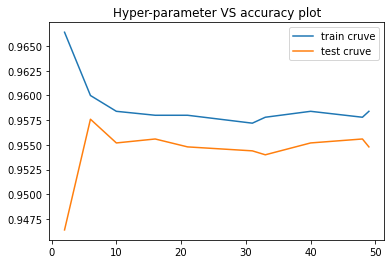

In [6]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.plot(n_neighbors,trainscores, label='train cruve')
plt.plot(n_neighbors,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [7]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

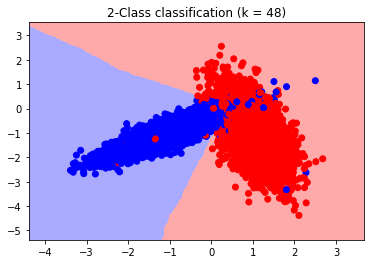

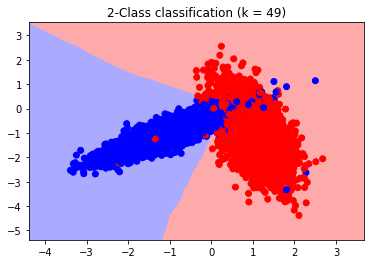

In [8]:
from matplotlib.colors import ListedColormap
for i in n_neighbors[-2:]:
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train, y_train)
    plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)